# Анализ временных рядов с помощью LSTM с использованием библиотеки Keras

Оригинал публикации "Time Series Analysis with LSTM using Python's Keras Library" (Usman Malik)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [19]:
apple_training_complete = pd.read_csv('/content/drive/MyDrive/dataset/AAPL_01_2013_12_2017.csv')
apple_testing_complete = pd.read_csv('/content/drive/MyDrive/dataset/AAPL_01_2018.csv')

In [3]:
apple_training_complete.iloc[60,:]

Date         2013-04-01
Open            15.7821
High            15.8464
Low             15.2764
Close           15.3182
Adj Close       13.3466
Volume        389732000
Name: 60, dtype: object

In [4]:
# Цена открытия
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Нормализация данных
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [7]:
# Преобразование обучающих данных
features_set = []
labels = []
for i in range(60, 1259):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [8]:
features_set, labels = np.array(features_set), np.array(labels)

In [9]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [10]:
# Обучение LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
model = Sequential()

In [12]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [13]:
model.add(Dropout(0.2))

In [14]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [15]:
model.add(Dense(units = 1))

In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
# Обучение алгоритму
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 60ms/step - loss: 0.0332
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0052
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0044
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0036
Epoch 8/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0040
Epoch 9/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0036
Epoch 10/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0031
Epoch 11/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0033
Epoch 12/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0034
Epoch 13/100
38/38 [====

In [20]:
# Тестирование LSTM
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

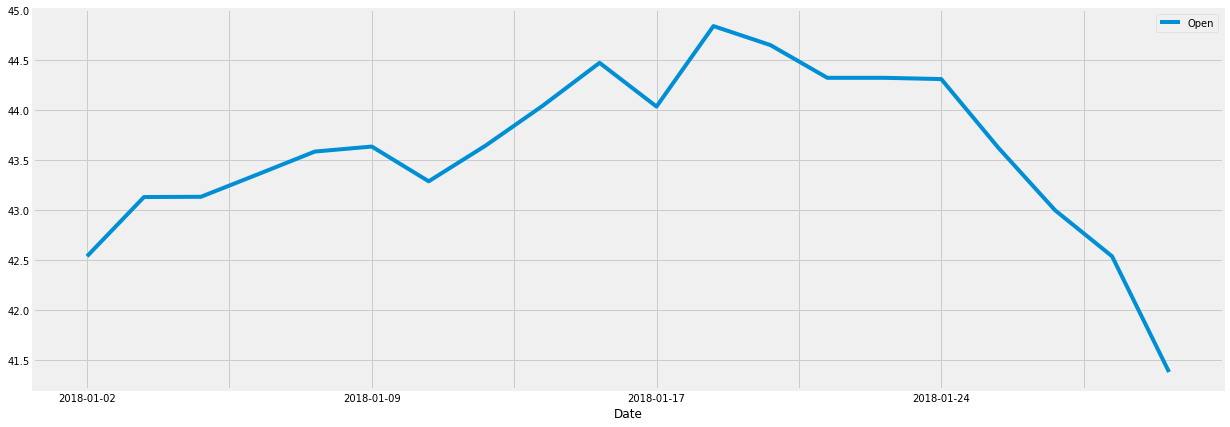

In [21]:
apple_test_complete.plot(x='Date', y='Open',figsize=(19, 7))
plt.show()

In [22]:
# Преобразование тестовых данных
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [23]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [24]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [25]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [26]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [27]:
# Прогноз
predictions = model.predict(test_features)

In [28]:
predictions = scaler.inverse_transform(predictions)

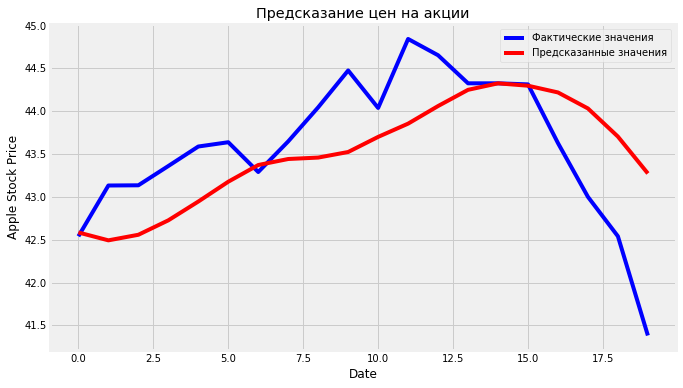

In [30]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Фактические значения')
plt.plot(predictions , color='red', label='Предсказанные значения')
plt.title('Предсказание цен на акции')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()